In [2525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [2526]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/Assignment 3/kc_house_data.csv')

In [2527]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2528]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [2529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [2530]:
df['date'] = pd.to_datetime(df['date'])

In [2531]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2532]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [2533]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['doy'] = df['date'].dt.day_of_year
df['dow'] = df['date'].dt.day_of_week

In [2534]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,doy,dow
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,13,10,2014,286,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,9,12,2014,343,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,25,2,2015,56,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,9,12,2014,343,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,18,2,2015,49,2


In [2535]:
column_name = 'total_sqft'
column_values = df['sqft_living'] + df['sqft_lot']

df.insert(7, column_name, column_values)


In [2536]:
column_name = 'total_sqft_15'
column_values = df['sqft_living15'] + df['sqft_lot15']

df.insert(22, column_name, column_values)

In [2537]:
#df['total_sqft'] = df['sqft_living'] + df['sqft_lot']


In [2538]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,total_sqft,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,total_sqft_15,day,month,year,doy,dow
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,6830,1.0,0,...,47.5112,-122.257,1340,5650,6990,13,10,2014,286,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,9812,2.0,0,...,47.7210,-122.319,1690,7639,9329,9,12,2014,343,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,10770,1.0,0,...,47.7379,-122.233,2720,8062,10782,25,2,2015,56,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,6960,1.0,0,...,47.5208,-122.393,1360,5000,6360,9,12,2014,343,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,9760,1.0,0,...,47.6168,-122.045,1800,7503,9303,18,2,2015,49,2


In [2539]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,total_sqft,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,total_sqft_15,day,month,year,doy,dow
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.718687e+04,1.494309,0.007542,...,47.560053,-122.213896,1986.552492,12768.455652,14755.008143,15.688197,6.574423,2014.322954,184.314949,2.010734
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.423000e+03,1.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,1721.000000,1.000000,1.000000,2014.000000,2.000000,0.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,7.035000e+03,1.000000,0.000000,...,47.471000,-122.328000,1490.000000,5100.000000,6979.000000,8.000000,4.000000,2014.000000,110.000000,1.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,9.575000e+03,1.500000,0.000000,...,47.571800,-122.230000,1840.000000,7620.000000,9460.000000,16.000000,6.000000,2014.000000,178.000000,2.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,1.300000e+04,2.000000,0.000000,...,47.678000,-122.125000,2360.000000,10083.000000,12232.000000,23.000000,9.000000,2015.000000,262.000000,3.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.652659e+06,3.500000,1.000000,...,47.777600,-121.315000,6210.000000,871200.000000,874620.000000,31.000000,12.000000,2015.000000,365.000000,6.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,4.158908e+04,0.539989,0.086517,...,0.138564,0.140828,685.391304,27304.179631,27438.012039,8.635063,3.115308,0.467616,94.745659,1.460592


<Axes: xlabel='bedrooms', ylabel='bathrooms'>

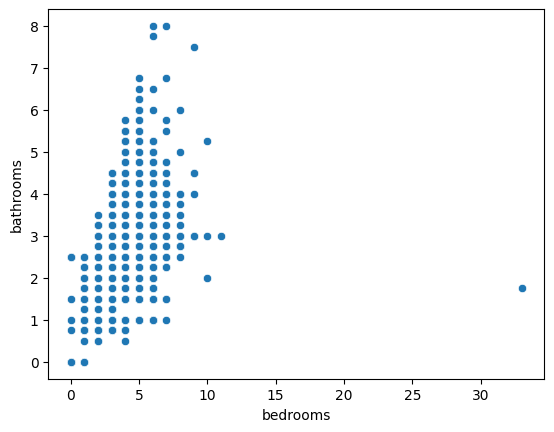

In [2540]:
sns.scatterplot(data=df, x='bedrooms', y='bathrooms')

In [2541]:
print(df[df['bedrooms'] > 15])

               id       date     price  bedrooms  bathrooms  sqft_living   
15870  2402100895 2014-06-25  640000.0        33       1.75         1620  \

       sqft_lot  total_sqft  floors  waterfront  ...      lat     long   
15870      6000        7620     1.0           0  ...  47.6878 -122.331  \

       sqft_living15  sqft_lot15  total_sqft_15  day  month  year  doy  dow  
15870           1330        4700           6030   25      6  2014  176    2  

[1 rows x 28 columns]


In [2542]:
print(df[df['bathrooms'] ==0])

               id       date      price  bedrooms  bathrooms  sqft_living   
875    6306400140 2014-06-12  1095000.0         0        0.0         3064  \
1149   3421079032 2015-02-17    75000.0         1        0.0          670   
3119   3918400017 2015-02-05   380000.0         0        0.0         1470   
5832   5702500050 2014-11-04   280000.0         1        0.0          600   
6994   2954400190 2014-06-24  1295650.0         0        0.0         4810   
9773   3374500520 2015-04-29   355000.0         0        0.0         2460   
9854   7849202190 2014-12-23   235000.0         0        0.0         1470   
10481   203100435 2014-09-18   484000.0         1        0.0          690   
14423  9543000205 2015-04-13   139950.0         0        0.0          844   
19452  3980300371 2014-09-26   142000.0         0        0.0          290   

       sqft_lot  total_sqft  floors  waterfront  ...      lat     long   
875        4764        7828     3.5           0  ...  47.6362 -122.322  \
1149

In [2543]:
df = df[df['bedrooms'] != 33]

In [2544]:
df = df[df['bedrooms'] != 0]

In [2545]:
df = df[df['bathrooms'] != 0]

In [2546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21596 non-null  int64         
 1   date           21596 non-null  datetime64[ns]
 2   price          21596 non-null  float64       
 3   bedrooms       21596 non-null  int64         
 4   bathrooms      21596 non-null  float64       
 5   sqft_living    21596 non-null  int64         
 6   sqft_lot       21596 non-null  int64         
 7   total_sqft     21596 non-null  int64         
 8   floors         21596 non-null  float64       
 9   waterfront     21596 non-null  int64         
 10  view           21596 non-null  int64         
 11  condition      21596 non-null  int64         
 12  grade          21596 non-null  int64         
 13  sqft_above     21596 non-null  int64         
 14  sqft_basement  21596 non-null  int64         
 15  yr_built       21596 non

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

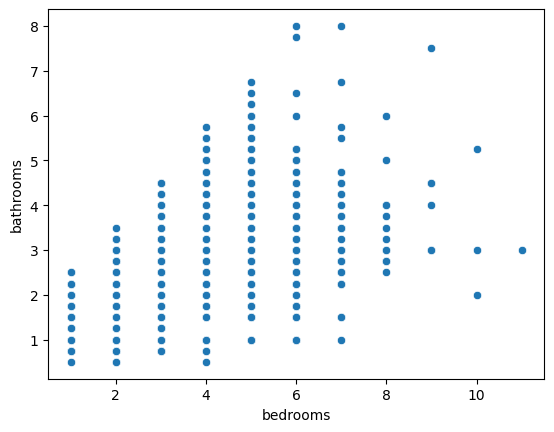

In [2547]:
sns.scatterplot(data=df, x='bedrooms', y='bathrooms')

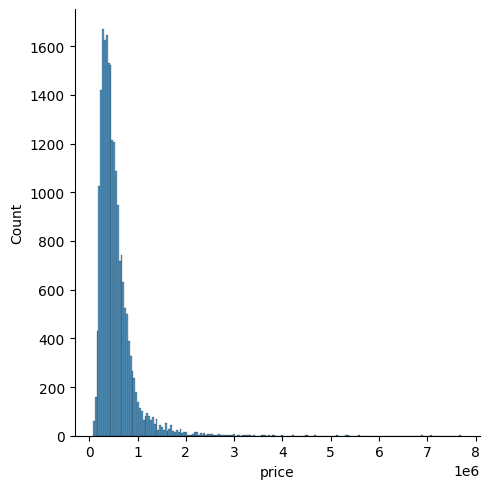

In [2548]:
sns.displot(df, x="price", bins=200)

<Axes: ylabel='price'>

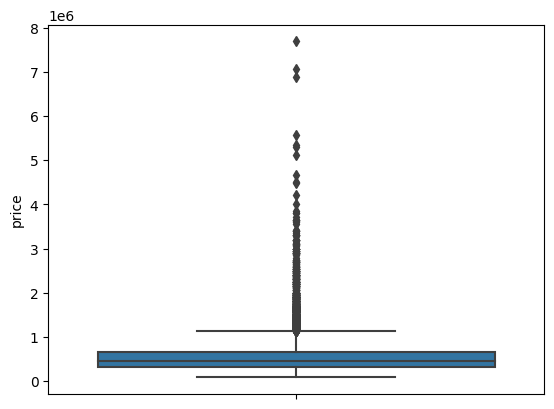

In [2549]:
sns.boxplot(data = df, y = 'price')

In [2550]:
z_scores = np.abs((df['price'] - df['price'].mean()) / df['price'].std())
outliers_mask = z_scores > 3
outliers = df[outliers_mask]
print(outliers)



               id       date      price  bedrooms  bathrooms  sqft_living   
21     2524049179 2014-08-26  2000000.0         3       2.75         3050  \
153    7855801670 2015-04-01  2250000.0         4       3.25         5180   
246    2025069065 2014-09-29  2400000.0         4       2.50         3650   
269    7960900060 2015-05-04  2900000.0         4       3.25         5050   
282    7424700045 2015-05-13  2050000.0         5       3.00         3830   
...           ...        ...        ...       ...        ...          ...   
21514  3262300818 2015-02-27  1865000.0         4       3.75         3790   
21530  8964800330 2015-04-07  3000000.0         4       3.75         5090   
21540   715010530 2015-01-13  1881580.0         5       3.50         4410   
21568   524059330 2015-01-30  1700000.0         4       3.50         3830   
21576  9253900271 2015-01-07  3567000.0         5       4.50         4850   

       sqft_lot  total_sqft  floors  waterfront  ...      lat     long   
2

In [2551]:
df = df[~outliers_mask]

In [2552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21190 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21190 non-null  int64         
 1   date           21190 non-null  datetime64[ns]
 2   price          21190 non-null  float64       
 3   bedrooms       21190 non-null  int64         
 4   bathrooms      21190 non-null  float64       
 5   sqft_living    21190 non-null  int64         
 6   sqft_lot       21190 non-null  int64         
 7   total_sqft     21190 non-null  int64         
 8   floors         21190 non-null  float64       
 9   waterfront     21190 non-null  int64         
 10  view           21190 non-null  int64         
 11  condition      21190 non-null  int64         
 12  grade          21190 non-null  int64         
 13  sqft_above     21190 non-null  int64         
 14  sqft_basement  21190 non-null  int64         
 15  yr_built       21190 non

<Axes: ylabel='price'>

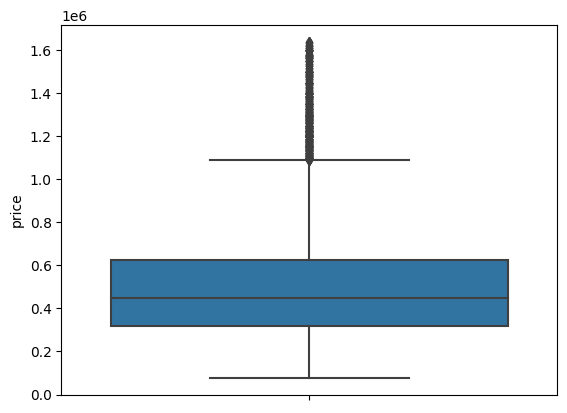

In [2553]:
sns.boxplot(data = df, y = 'price')

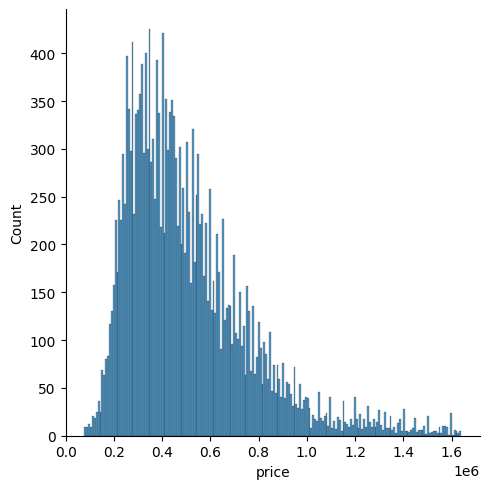

In [2554]:
sns.displot(df, x="price", bins=200)

In [2555]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,total_sqft,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,total_sqft_15,day,month,year,doy,dow
count,2.119000e+04,21190,2.119000e+04,21190.000000,21190.000000,21190.000000,2.119000e+04,2.119000e+04,21190.000000,21190.000000,...,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000
mean,4.592430e+09,2014-10-29 03:46:05.493157120,5.069308e+05,3.354696,2.087529,2032.505569,1.482715e+04,1.685965e+04,1.486881,0.004342,...,47.558983,-122.213727,1960.418405,12632.094903,14592.513308,15.697310,6.577678,2014.322558,184.423407,2.010665
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.423000e+03,1.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,1721.000000,1.000000,1.000000,2014.000000,2.000000,0.000000
25%,2.125400e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.500000,1410.000000,5.005250e+03,6.989250e+03,1.000000,0.000000,...,47.467025,-122.329000,1480.000000,5080.000000,6920.000000,8.000000,4.000000,2014.000000,111.000000,1.000000
50%,3.905040e+09,2014-10-16 00:00:00,4.470000e+05,3.000000,2.250000,1890.000000,7.560000e+03,9.498000e+03,1.000000,0.000000,...,47.569900,-122.231000,1820.000000,7576.500000,9408.000000,16.000000,6.000000,2014.000000,178.000000,2.000000
75%,7.334501e+09,2015-02-17 00:00:00,6.275000e+05,4.000000,2.500000,2500.000000,1.049075e+04,1.275700e+04,2.000000,0.000000,...,47.678775,-122.124000,2330.000000,10000.000000,12068.750000,23.000000,9.000000,2015.000000,262.000000,3.000000
max,9.900000e+09,2015-05-27 00:00:00,1.640000e+06,11.000000,7.500000,7480.000000,1.651359e+06,1.652659e+06,3.500000,1.000000,...,47.777600,-121.315000,5790.000000,871200.000000,874620.000000,31.000000,12.000000,2015.000000,365.000000,6.000000
std,2.878254e+09,NaN,2.592548e+05,0.894662,0.736035,836.753532,4.040185e+04,4.055209e+04,0.538299,0.065750,...,0.139456,0.141434,655.152481,27194.344096,27321.490036,8.629665,3.114485,0.467466,94.712393,1.461537


In [2557]:
grouped_zip = df.groupby(['zipcode']).mean()
print(grouped_zip)

                   id                          date         price  bedrooms   
zipcode                                                                       
98001    4.651274e+09 2014-10-29 04:15:17.451523584  2.811949e+05  3.393352  \
98002    4.850894e+09 2014-11-08 02:39:11.758793984  2.342840e+05  3.326633   
98003    4.674182e+09 2014-11-07 06:56:34.285714176  2.941113e+05  3.357143   
98004    4.245570e+09 2014-10-24 07:43:18.260869632  1.019314e+06  3.643478   
98005    5.060602e+09 2014-10-29 12:30:55.214723840  7.783356e+05  3.840491   
...               ...                           ...           ...       ...   
98177    3.980186e+09 2014-10-17 17:04:23.414634240  6.139991e+05  3.373984   
98178    4.276978e+09 2014-10-28 05:58:37.241379328  3.052894e+05  3.302682   
98188    4.481851e+09 2014-11-12 02:49:24.705882368  2.890783e+05  3.433824   
98198    5.152291e+09 2014-11-04 13:27:25.714285824  3.028789e+05  3.182143   
98199    3.476545e+09 2014-10-30 03:14:12.631578880 

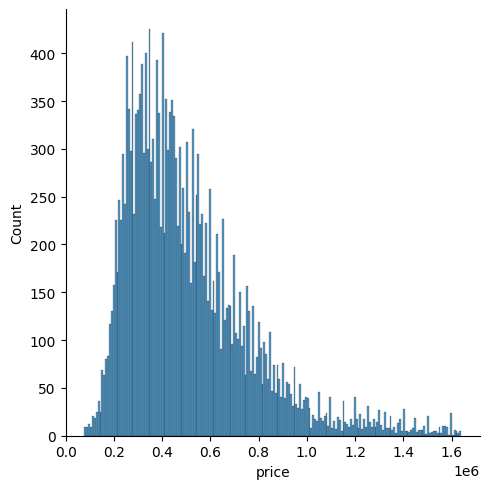

In [2558]:
sns.displot(df, x="price", bins=200)

In [2559]:
df['price_transformed'] = df['price'].copy()


In [2560]:
df['price_transformed'] = np.log(df['price_transformed'])


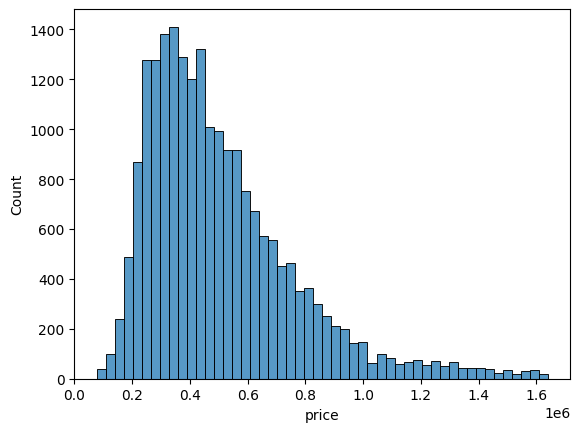

<Axes: xlabel='price_transformed', ylabel='Count'>

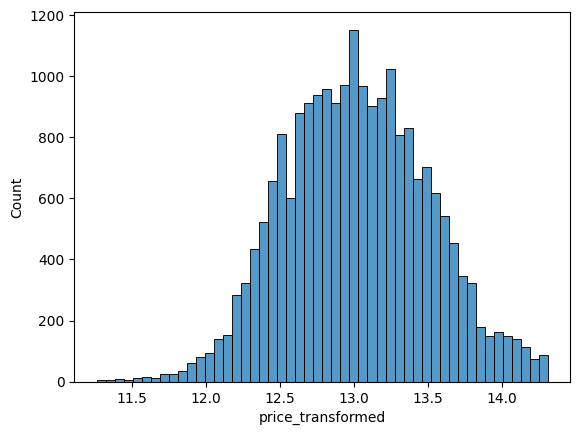

In [2586]:
sns.histplot(df['price'], bins=50)
plt.show()
sns.histplot(df['price_transformed'], bins=50)



In [2562]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,total_sqft,floors,waterfront,...,long,sqft_living15,sqft_lot15,total_sqft_15,day,month,year,doy,dow,price_transformed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,6830,1.0,0,...,-122.257,1340,5650,6990,13,10,2014,286,0,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,9812,2.0,0,...,-122.319,1690,7639,9329,9,12,2014,343,1,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,10770,1.0,0,...,-122.233,2720,8062,10782,25,2,2015,56,2,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,6960,1.0,0,...,-122.393,1360,5000,6360,9,12,2014,343,1,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,9760,1.0,0,...,-122.045,1800,7503,9303,18,2,2015,49,2,13.142166


In [2587]:
results = ols("price ~ waterfront + month + dow + view + condition + grade + bedrooms + bathrooms + sqft_living + sqft_lot + total_sqft + floors + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + total_sqft_15 + price_transformed", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:53:05   Log-Likelihood:            -2.6769e+05
No. Observations:               21190   AIC:                         5.354e+05
Df Residuals:                   21169   BIC:                         5.356e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.983e+05   1.09e+0

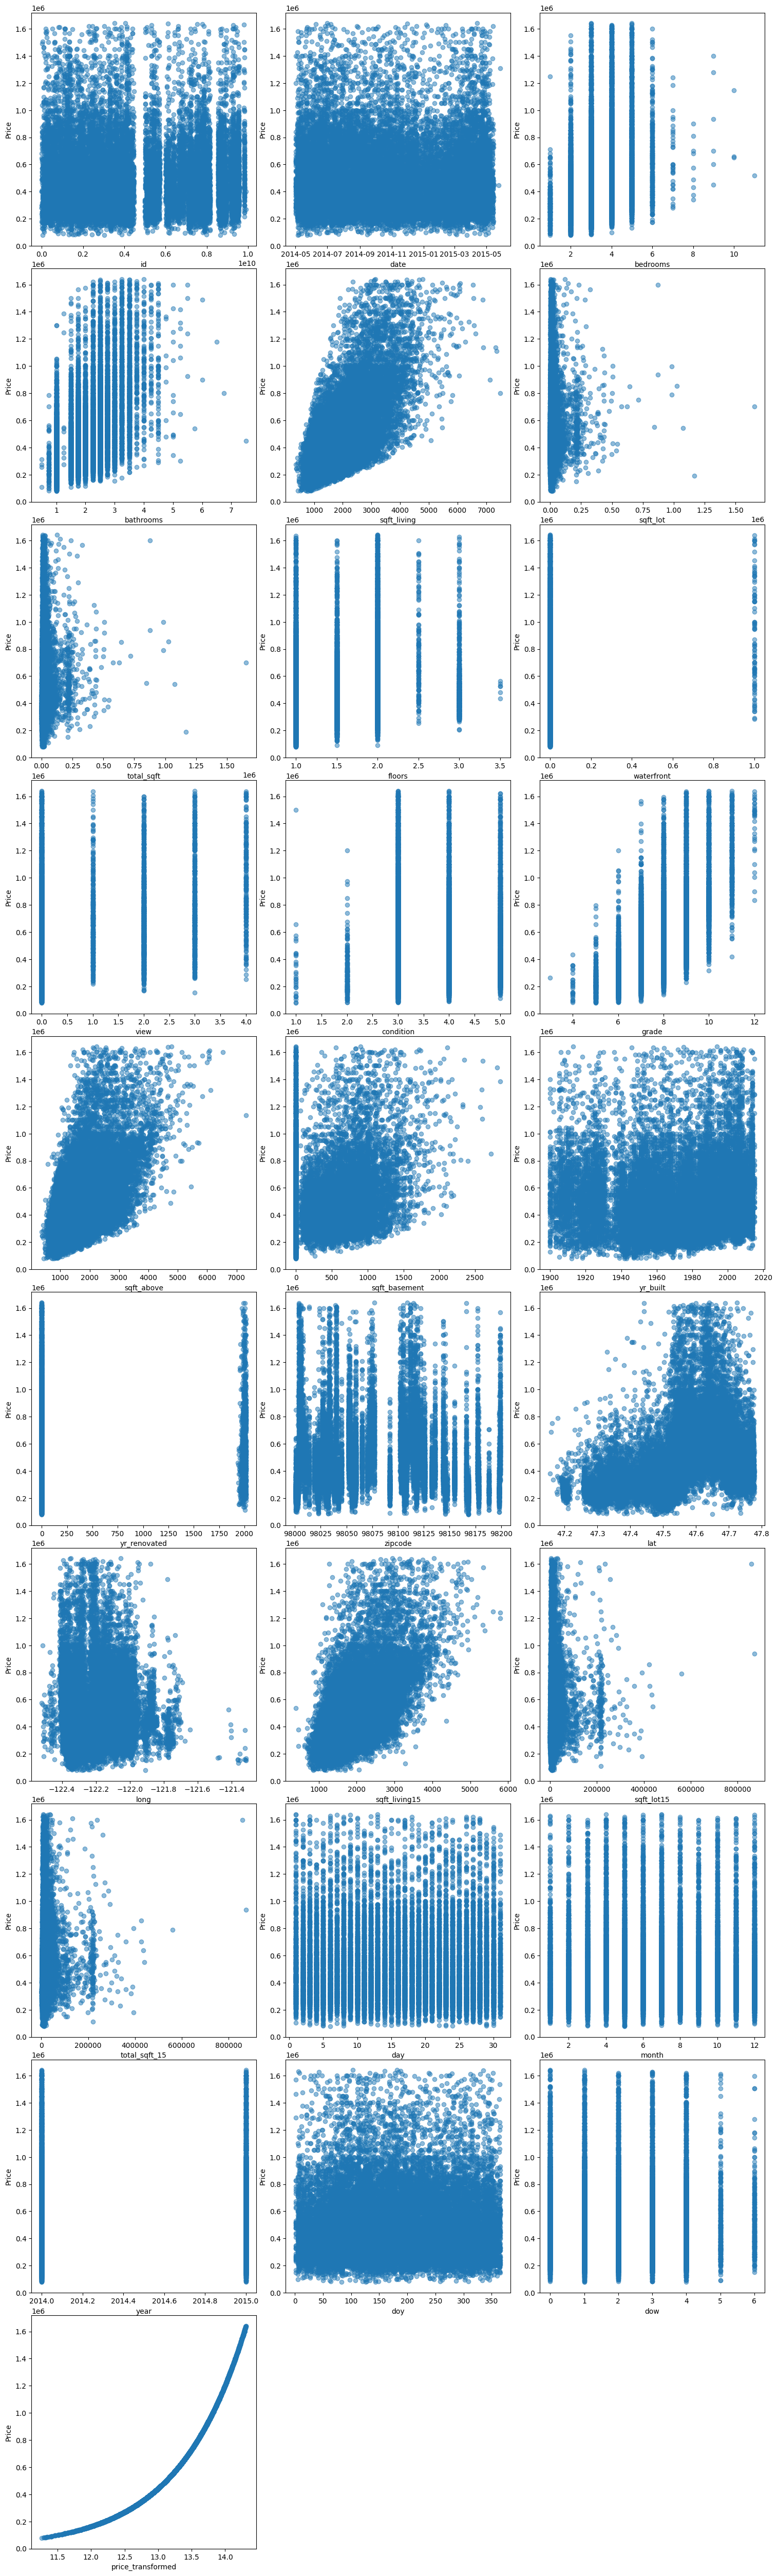

In [2588]:
import matplotlib.pyplot as plt

# Exclude the 'price' column from the loop
columns = df.columns.drop('price')

# Set the number of rows and columns for the subplots grid
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

# Iterate over the columns and create scatter plots
for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]  # Select the appropriate subplot
    ax.scatter(df[column], df['price'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

# If the number of subplots is not a multiple of the number of columns,
# remove the empty subplots
if len(columns) % num_cols != 0:
    for j in range(len(columns) % num_cols, num_cols):
        fig.delaxes(axes[num_rows-1, j])

plt.show()


<Axes: xlabel='bathrooms', ylabel='price'>

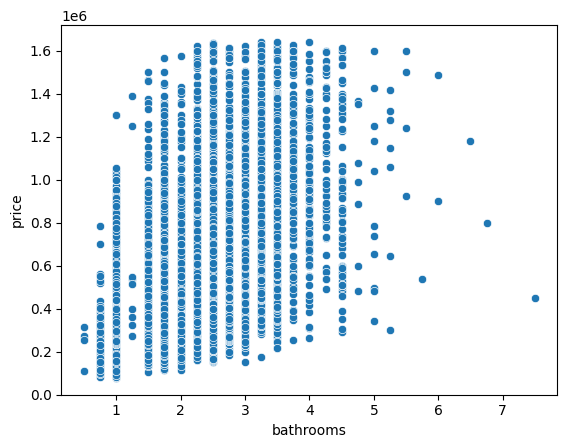

In [2564]:
sns.scatterplot(data=df, x='bathrooms', y='price')

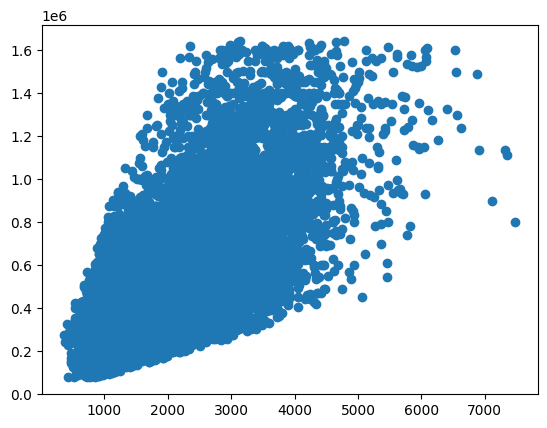

In [2565]:
plt.scatter(df['sqft_living'], df['price'])

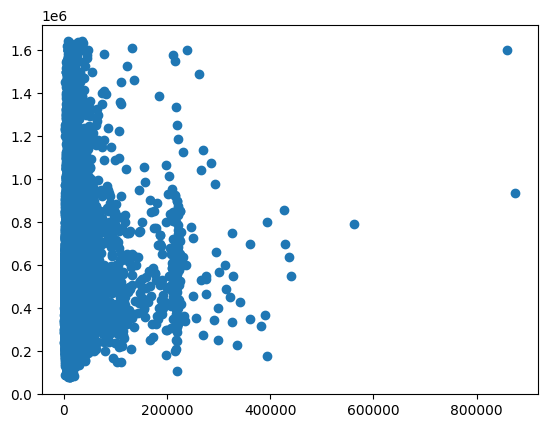

In [2566]:
plt.scatter(df['total_sqft_15'], df['price'])

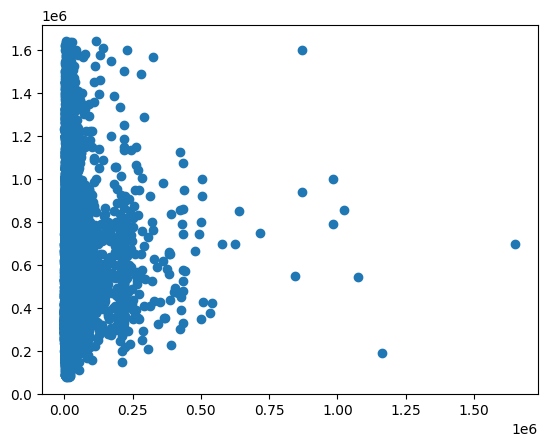

In [2567]:
plt.scatter(df['sqft_lot'], df['price'])

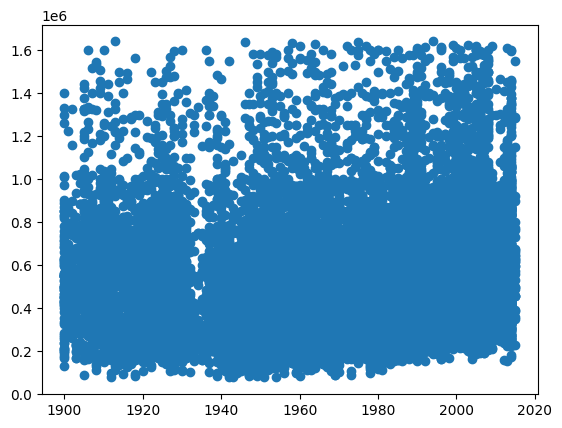

In [2568]:
plt.scatter(df['yr_built'], df['price'])

In [2569]:
results = ols("price ~ sqft_living + bedrooms + bathrooms + yr_built + zipcode", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     4249.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:44:17   Log-Likelihood:            -2.8685e+05
No. Observations:               21190   AIC:                         5.737e+05
Df Residuals:                   21184   BIC:                         5.738e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.484e+07   2.52e+06     -5.895      

In [2570]:
correlation_sqft_living = df['price'].corr(df['sqft_living'])
print(correlation_sqft_living)

0.6646655705394586


In [2571]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,total_sqft,floors,waterfront,...,long,sqft_living15,sqft_lot15,total_sqft_15,day,month,year,doy,dow,price_transformed
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,6830,1.0,0,...,-122.257,1340,5650,6990,13,10,2014,286,0,12.309982


In [2572]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer

In [2573]:
categorical_features = ['waterfront','month','dow', 'view', 'condition', 'grade' ] #first determine categorical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','total_sqft', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_sqft_15', 'price_transformed']
target = 'price'

In [2574]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1234)

In [2575]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [2576]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)
])

In [2577]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to your training data
linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print(linear_pred)

np.sqrt(mean_squared_error(linear_pred,y_test))


[419712. 600992. 306400. ... 409952. 173360. 788336.]


65219.18263488896

In [2578]:
#L2 type regression model. L2 minimizes features rather than eliminates them. Use this if you need to retain the features you've specified.
#ridge_regression = Pipeline([
#    ('imputer', SimpleImputer()),  # Handle missing values if needed
#    ('scaler', StandardScaler()),  # Scale the features if needed
#     ('regressor', Ridge(alpha=3.0))  # Linear regression model
#])

In [2579]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0)) #default value will be 1
])

ridge_regression.fit(X_train, y_train)

ridge_pred = ridge_regression.predict(X_test)
print(ridge_pred)

np.sqrt(mean_squared_error(ridge_pred,y_test))

[419326.81611291 601028.83855207 306431.62886943 ... 410435.02193412
 172749.73648679 788023.56437965]


65272.24017470355

In [2580]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=2.0)) #alpha sets how sensitive the model is at removing variables. Higher the more it removes.
])

lasso_regression.fit(X_train, y_train)

lasso_pred = lasso_regression.predict(X_test)
print(lasso_pred)

np.sqrt(mean_squared_error(lasso_pred,y_test))

[419307.03624224 600764.46065905 306270.95043098 ... 410420.66319582
 172824.53473102 788093.09394225]


65266.075635629466

In [2581]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=3.0, l1_ratio=0.5)) #L1 eliminates features, L2 simply minimizes them. Default here is 0.5 if not set.
])

elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)
print(elasticnet_pred)

np.sqrt(mean_squared_error(elasticnet_pred, y_test))

[363872.61751715 615224.14302465 386166.64648386 ... 483443.703449
 276890.35352552 600509.50582563]


134589.1858753762